In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd

# CAPA DE RED
class neural_layer():
    def __init__(self, n_conexiones, n_neuronas, f_activacion):
        self.f_activacion =  f_activacion
        self.bias = np.random.rand(1, n_neuronas) * 2 - 1
        self.w = np.random.rand(n_conexiones, n_neuronas) * 2 - 1

# función y derivada
f_sigmoide = (lambda x: 1/(1 + np.exp(-x)), lambda x: x * (1 - x))
f_relu = lambda x: np.maximum(0, x)
f_tanh = lambda x: (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

df_  = pd.read_csv("data/UJIndoorLoc_trainingData.csv")

In [10]:
wifi_columns = 520
x_train = np.array(df_[df_.columns[:520]])
y_train = np.array(df_.LATITUDE)[:, np.newaxis]


from keras.models import Sequential
from keras.layers.core import Dense


f_activation = ['relu', 'sigmoid', 'tanh']

model = Sequential()
model.add(Dense(700, input_dim=wifi_columns, activation='relu'))
model.add(Dense(500, input_dim=wifi_columns, activation='softsign'))
model.add(Dense(350, input_dim=wifi_columns, activation='tanh'))
model.add(Dense(180, input_dim=wifi_columns, activation='linear'))
model.add(Dense(50, input_dim=wifi_columns, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mse', 'mae'])

model.fit(x_train, y_train, epochs=15)

# evaluamos el modelo
#scores = model.evaluate(training_data, target_data)

Epoch 1/15
19937/19937 [==============================] - 8s 378us/step - loss: 23666958990679.5586 - mean_squared_error: 23666958990679.5586 - mean_absolute_error: 4864869.8769
Epoch 2/15
19937/19937 [==============================] - 7s 354us/step - loss: 23666958972692.2500 - mean_squared_error: 23666958972692.2500 - mean_absolute_error: 4864869.8835
Epoch 3/15
19937/19937 [==============================] - 7s 361us/step - loss: 23666959035700.4297 - mean_squared_error: 23666959035700.4297 - mean_absolute_error: 4864869.8725
Epoch 4/15
19937/19937 [==============================] - 9s 429us/step - loss: 23666959072411.3672 - mean_squared_error: 23666959072411.3672 - mean_absolute_error: 4864869.8785
Epoch 5/15
19937/19937 [==============================] - 8s 379us/step - loss: 23666959075251.4727 - mean_squared_error: 23666959075251.4727 - mean_absolute_error: 4864869.8872
Epoch 6/15
19937/19937 [==============================] - 7s 373us/step - loss: 23666959019080.5742 - mean_squ

In [13]:
from sklearn import preprocessing

def clean_dataframe(df, input_columns, target_column, list_val):
    x_train = df[input_columns]
    y_train = np.array(df[target_column])[:, np.newaxis] #y_train = df_train[target_column]
    #if (list_val[0]):
    x_train = x_train.apply(lambda x: 100-x, axis=1)
    #if (list_val[1]):
    #x_train = preprocessing.scale(x_train)
    #if (list_val[2]):
    x_train = preprocessing.normalize(x_train)
    return np.array(x_train), y_train

wifi_columns = 520
#x_train = np.array(df_[df_.columns[:520]])
#y_train = np.array(df_.LATITUDE)[:, np.newaxis]
x_train, y_train = clean_dataframe(df_, df_.columns[:520], "LATITUDE", [])

from keras.models import Sequential
from keras.layers.core import Dense


f_activation = ['relu', 'sigmoid', 'tanh']

model = Sequential()
model.add(Dense(700, input_dim=wifi_columns, activation='relu'))
model.add(Dense(500, input_dim=wifi_columns, activation='softsign'))
model.add(Dense(350, input_dim=wifi_columns, activation='tanh'))
model.add(Dense(180, input_dim=wifi_columns, activation='linear'))
model.add(Dense(50, input_dim=wifi_columns, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mse', 'mae'])

model.fit(x_train, y_train, epochs=15)

# evaluamos el modelo
#scores = model.evaluate(training_data, target_data)

Epoch 1/15
19937/19937 [==============================] - 8s 399us/step - loss: 23666959051163.1992 - mean_squared_error: 23666959051163.1992 - mean_absolute_error: 4864869.8825
Epoch 2/15
19937/19937 [==============================] - 8s 377us/step - loss: 23666959008140.9219 - mean_squared_error: 23666959008140.9219 - mean_absolute_error: 4864869.8740
Epoch 3/15
19937/19937 [==============================] - 8s 388us/step - loss: 23666959052109.9023 - mean_squared_error: 23666959052109.9023 - mean_absolute_error: 4864869.8831
Epoch 4/15
19937/19937 [==============================] - 8s 420us/step - loss: 23666959108385.9883 - mean_squared_error: 23666959108385.9883 - mean_absolute_error: 4864869.8905
Epoch 5/15
19937/19937 [==============================] - 7s 364us/step - loss: 23666959024234.8320 - mean_squared_error: 23666959024234.8320 - mean_absolute_error: 4864869.8750
Epoch 6/15
19937/19937 [==============================] - 8s 385us/step - loss: 23666959099550.1172 - mean_squ

# sigmoid:  $f(x) = \frac{1}{1-e^{-x}}$
# tanh: $f(x)=\frac{2}{1+e^{-2x}}-1 = \frac{e^x-e^{-x}}{e^x+e^{-x}}$
# relu: $f(x)=max(0, x)= \lbrace^{0;\ x\lt 0}_{x;\ x \geq 0}$

<IPython.core.display.Javascript object>


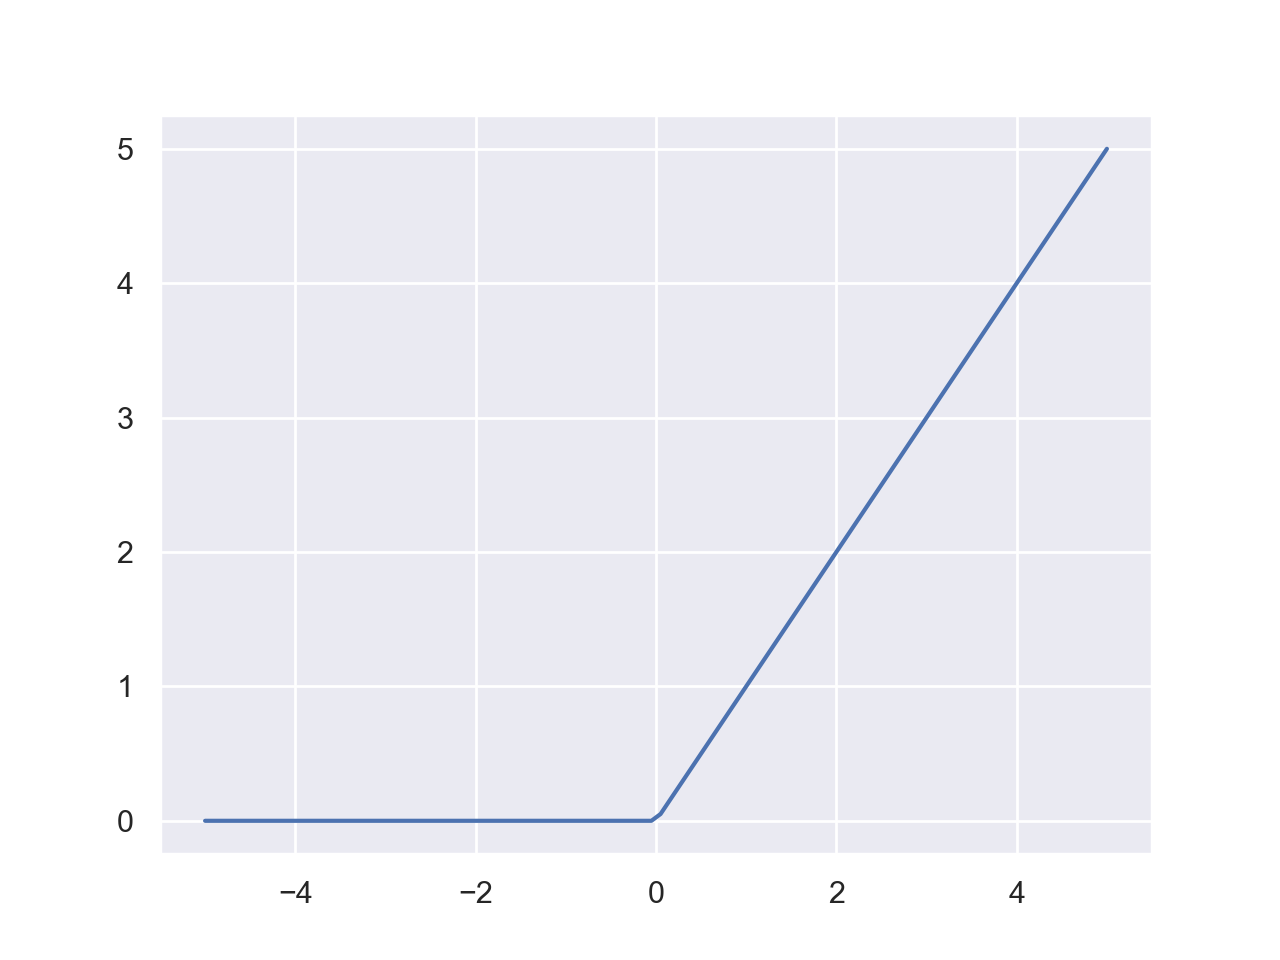

In [12]:
%matplotlib notebook
import seaborn as sns
sigm = lambda x: 1/(1 + np.e ** (-x))
_x = np.linspace(-5,5, 100)
sns.set(style="darkgrid")
plt.plot(_x, f_relu(_x))

In [114]:
pd.DataFrame(result_list)

fit_time        0.32818429470062255 +/- 0.04760400573155117
score_time    0.013472676277160645 +/- 0.003568309638817945
test_mae           89996.15594150961 +/- 130219.04564148556
test_mse           50182173917689.72 +/- 120859445981983.53
test_r2           -72293313736980.64 +/- 174112222814112.25
dtype: object

fit_time      0.27582075595855715 +/- 0.008178107775353525
score_time    0.012851715087890625 +/- 0.00144373510453069
test_mae           85089.94062445458 +/- 127147.8782194712
test_mse          62943139816736.89 +/- 171696184842814.25
test_r2           -90676983460813.39 +/- 247348514208326.1
dtype: object

fit_time              0.393526029586792 +/- 0.04435700880176216
score_time      0.004812550544738769 +/- 5.6144529679850805e-05
test_mae               25054195071.745655 +/- 22312965052.83703
test_mse        8.774627572845523e+23 +/- 9.725739768424016e+23
test_r2       -1.2640881303575365e+24 +/- 1.4011070097444798...
dtype: object

fit_time            0.40135142803192136 +/- 0.02450366538910096
score_time       0.005463814735412598 +/- 0.0013138840883400386
test_mae              39703681649.503044 +/- 47188199814.019424
test_mse      2.4123455799089627e+24 +/- 4.7506878187679806e+24
test_r2       -3.4752670567128053e+24 +/- 6.843923611439712e+24
dtype: object

fit_time            0.38530113697052004 +/- 0.03090588967060711
score_time       0.004860925674438477 +/- 0.0002351358384326568
test_mae                   5287487.811167 +/- 4331192.398147694
test_mse      2.4542314656948216e+16 +/- 2.3220886580008628e+16
test_r2         -3.535608593275871e+16 +/- 3.34524136306432e+16
dtype: object

fit_time          0.4218210935592651 +/- 0.03143776730104532
score_time    0.005525732040405273 +/- 0.0016193906762142043
test_mae            71714.94019159491 +/- 188714.88522986489
test_mse            25166999120397.688 +/- 76693698835336.06
test_r2            -36256017250536.91 +/- 110486278267790.69
dtype: object

fit_time            0.42221221923828123 +/- 0.05131153768803283
score_time      0.005055356025695801 +/- 0.00036873005594932157
test_mae               261206633.91949677 +/- 323014749.0456155
test_mse       1.4406000138514101e+20 +/- 2.476592518474874e+20
test_r2       -2.0753534699728844e+20 +/- 3.567822315359117e+20
dtype: object

fit_time           0.39957308769226074 +/- 0.011466736511284614
score_time       0.005256485939025879 +/- 0.0008528120118625178
test_mae               705105055.0242938 +/- 1039987612.5173811
test_mse       1.1464326202537182e+21 +/- 1.914064018026102e+21
test_r2       -1.6515707994287629e+21 +/- 2.757433960409804e+21
dtype: object

In [1]:
import sys
sys.path.append("./lib/")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from lib.Methods import GeneralMethods
from lib.edasSearch import EdasHyperparameterSearch
from lib.Hiperparametros import HyperparameterSwitcher
from lib.ImportacionModelos import getClassifierNames
from lib.ImportacionModelos import getClassifierModels
from lib.ImportacionModelos import getRegressorNames
from lib.ImportacionModelos import getRegressorModels
from lib.graphicGenerator import GraphicBuilder
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.base import is_classifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn import metrics as scoreMetrics
# import geopy.distance
from functools import reduce

def accert(y_true, y_pred): 
    cm = confusion_matrix(y_true, y_pred)
    return (cm.diagonal()/cm.sum(0)).mean()
"""

_meanLat = 39.9926853
_meanLon = -0.0673033
_minLongitude = -7705
_maxLongitude = -7290
_minLatitude = 4864735
_maxLatitude = 4865023
_maxLatitudeGPS = 39.993720
_maxLongitudeGPS = -0.069254
_minLatitudeGPS = 39.991626
_minLongitudeGPS = -0.065425

def longitudeToGPS(x):
    return (_maxLongitudeGPS - _minLongitudeGPS) * (x - _minLongitude) / (_maxLongitude - _minLongitude) + _minLongitudeGPS

def latitudeToGPS(x):
    return (_maxLatitudeGPS - _minLatitudeGPS) * (x - _minLatitude) / (_maxLatitude - _minLatitude) + _minLatitudeGPS

def latitudeListDistance(y_true, y_pred):
    return list(map(lambda yt,yp : geopy.distance.vincenty((_meanLon, yt),(_meanLon, yp)).m , latitudeToGPS(y_true), latitudeToGPS(y_pred)))

def longitudeListDistance(y_true, y_pred):
    return list(map(lambda yt,yp : geopy.distance.vincenty((yt, _meanLat),(yp, _meanLat)).m , longitudeToGPS(y_true), longitudeToGPS(y_pred)))    

def distance2d(y_true, y_pred):
    ldis = []
    if ((y_true>0).sum()>0):
        #ldis = list(map(lambda yt,yp : geopy.distance.vincenty((_meanLon, yt),(_meanLon, yp)).m , latitudeToGPS(y_true), latitudeToGPS(y_pred)))
        ldis = latitudeListDistance(y_true, y_pred)
    else:
        #ldis = list(map(lambda yt,yp : geopy.distance.vincenty((yt, _meanLat),(yp, _meanLat)).m , longitudeToGPS(y_true), longitudeToGPS(y_pred)))
        ldis = longitudeListDistance(y_true, y_pred)
    return reduce(lambda x,y: x+y, ldis) / len(ldis)
"""

def mse(y_true, y_pred):
    return scoreMetrics.mean_squared_error(y_true, y_pred)
    
def mae(y_true, y_pred):
    return scoreMetrics.mean_absolute_error(y_true, y_pred)

def score_metrics(estimator, binary=False, params = {}):
    score_ = {}
    if (is_classifier(estimator)):
        if (binary):
            score_['average_precision'] = 'average_precision_weighted'
            score_['precision'] = 'precision'
            score_['recall'] = 'recall'
            score_['balanced_accuracy'] = 'balanced_accuracy'
            score_['roc_auc'] = 'roc_auc'
        score_['nbaccuracy'] = make_scorer(accert)
        score_['accuracy'] = 'accuracy'
    else:
        score_['mae'] = make_scorer(mae) # 'mean_absolute_error',
        score_['mse'] = make_scorer(mse) # 'mean_squared_error',
        # score['distance'] = make_scorer(distance2d)
        score_['r2'] = 'r2'
    return score_

def cv_fold(estimator, n_splits=10, test_size=0.2, random_state=7):
    if (is_classifier(estimator)):
        return ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=random_state)
    else:
        return StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=random_state)

from sklearn import preprocessing

def clean_dataframe(df, input_columns, target_column, list_val):
    x_train = df_train[input_columns]
    y_train = df_train[target_column]
    if (list_val[0]):
        x_train = x_train.apply(lambda x: 100-x, axis=1)
    if (list_val[1]):
        x_train = preprocessing.scale(x_train)
    if (list_val[2]):
        x_train = pd.DataFrame(preprocessing.normalize(x_train), columns=wifi_columns) #preprocessing.normalize(x_train)
    return x_train, y_train

df_train = pd.read_csv("data/UJIndoorLoc_trainingData.csv")
df_test = pd.read_csv("data/UJIndoorLoc_validationData.csv")

wifi_columns = df_train.columns[:520]
target_column = ['BUILDINGID', 'FLOOR', 'LATITUDE', 'LONGITUDE']
building = 0
floor = 1
latitude = 2
longitude = 3
seed = 7

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
classifier_model = LogisticRegression()
regression_model = LinearRegression()

## train_dataset = dataset.sample(frac=0.8,random_state=0)
## test_dataset = dataset.drop(train_dataset.index)

estimator = regression_model
kf = cv_fold(estimator)


In [2]:
output = ['BUILDINGID', 'FLOOR', 'LATITUDE', 'LONGITUDE']
building = 0
floor = 1
latitude = 2
longitude = 3
#output[building]

wifi_columns = df_train.columns[:520]
#x_train = df_train[wifi_columns]
#y_train = df_train[output[building]]
x_train, y_train = clean_dataframe(df_train, wifi_columns, target_column[latitude], [1, 0, 1])


In [12]:
from __future__ import absolute_import, division, print_function

import pathlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

def build_model(input_shape):
    model = keras.Sequential([
        layers.Dense(254, activation=tf.nn.tanh, input_shape=[input_shape]),
        layers.Dense(128, activation=tf.nn.softmax),
        layers.Dense(128, activation=tf.nn.sigmoid),
        layers.Dense(32, activation=tf.nn.relu),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

model = build_model(len(x_train.keys())) #520

1.13.1
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 254)               132334    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32640     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 185,647
Trainable params: 185,647
Non-trainable params: 0
_________________________________________________________________


In [15]:
loss, mae, mse = model.evaluate(x_train, y_train-4864000, verbose=0)
#max(y_train)-4864000
print("Testing set Mean Abs Error:  " + str(mae))

print("Testing set Mean Sqr Error:  " + str(mse))
#23666960000000

Testing set Mean Abs Error:  870.68695
Testing set Mean Sqr Error:  762574.06


<IPython.core.display.Javascript object>


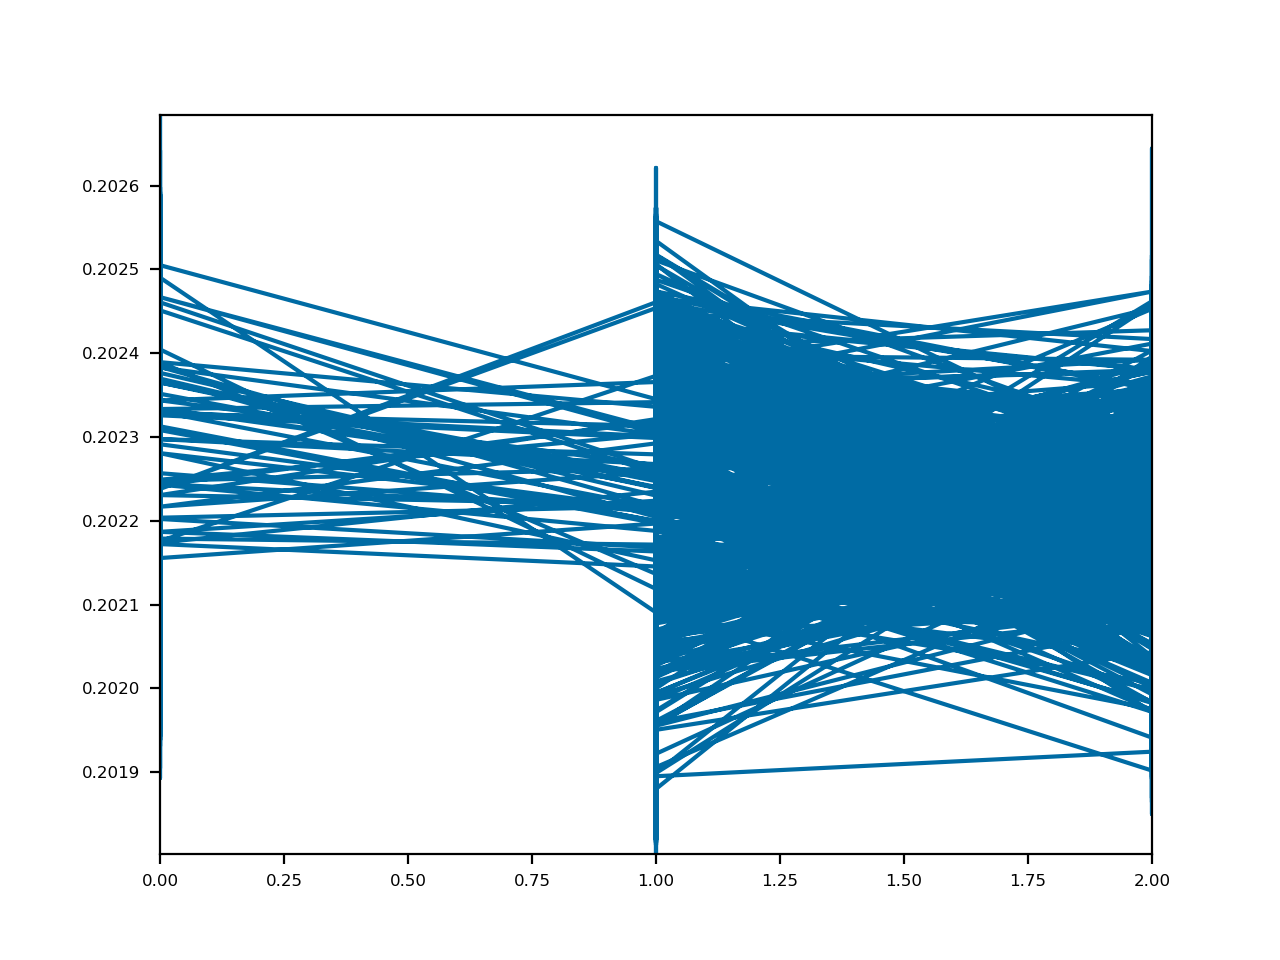

In [16]:
x_test, y_test = clean_dataframe(df_test, wifi_columns, target_column[building], [1, 0, 1])
test_predictions = model.predict(x_test).flatten()
%matplotlib notebook
plt.plot(y_test, test_predictions)
plt.show()
#plt.xlabel('True Values [MPG]')
#plt.ylabel('Predictions [MPG]')
#plt.axis('equal')
#plt.axis('square')
#plt.xlim([0,plt.xlim()[1]])
#plt.ylim([0,plt.ylim()[1]])
#_ = plt.plot([-100, 100], [-100, 100])
#plt.plot()
#plt.show()

In [14]:
y_test.describe()

count    19937.000000
mean         1.212820
std          0.833139
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: BUILDINGID, dtype: float64

In [69]:
import tensorflow as tf
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import seaborn
#import deap # !pip install deap

f_sigmoide = (lambda x: 1/(1 + np.e ** (-x)),
              lambda x: x * (1 - x))

f_relu = lambda x: np.maximum(0, x)

# CAPA DE RED
class neural_layer():
    def __init__(self, n_conexiones, n_neuronas, f_activacion):
        self.f_activacion =  f_activacion
        self.bias = np.random.rand(1, n_neuronas) * 2 - 1
        self.w = np.random.rand(n_conexiones, n_neuronas) * 2 - 1

# RED NEURONAL
def create_nn(topology, f_activacion):
    nn = []
    for i, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[i], topology[i+1], f_activacion))
    return nn

# ENTRENAMIENTO

p = 520
topology = [p, 260, 8, 16, 8, 4, 1]

neural_network = create_nn(topology, f_sigmoide)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: Yp - Yr)

def train(neural_network, X, Y, f_cost, lr=0.5, train=True):
    out = [(None, X)]
    # Forward pass
    #z = X @neural_network[l].w + neural_network[1].bias
    #a = neural_network[0].f_activacion(z)

    for l, layer in enumerate(neural_network):
        #z = out[-1][1] @ neural_network[l].w #+ neural_network[l].bias
        #z = z + pd.concat([pd.DataFrame(neural_network[0].bias)]*z.shape[0], ignore_index=True) # Ignores the index
        z = np.array(out[-1][1] @ neural_network[l].w) + neural_network[l].bias
        a = neural_network[l].f_activacion[0](z)
        out.append((z, a))
        
    #print(f_cost[0](out[-1][1], Y))

    if train:
        # Backward pass
        deltas = []
    
    for l in reversed(range(0, len(neural_network))):
        z = out[l+1][0]
        a = out[l+1][1]

        if l == len(neural_network)-1:
            # Calcular delta última capa
            deltas.insert(0, f_cost[1](a, Y) * neural_network[l].f_activacion[1](a))
        else:
            # Calcular delta respecto a capa previa
            #print('1', deltas[0].shape, _w.shape)
            deltas.insert(0, deltas[0] @ _w.T * neural_network[l].f_activacion[1](a))

        _w = neural_network[l].w      

        # Gradient descent
        neural_network[l].bias = neural_network[l].bias - np.mean(deltas[0], axis=0, keepdims=True) * lr

        #print('2', out[l][1].T.shape, deltas[0].shape)
        neural_network[l].w = neural_network[l].w - out[l][1].T @ deltas[0] * lr

    return out[-1][1]

train(neural_network, x_train, y_train, l2_cost, 0.5)    

print("")

Exception: Data must be 1-dimensional

In [68]:
#iteration = [[i%2, int(i/2)%2, int(i/4)] for i in range(8)]
#np.array([[1,2,2],[1,2,3]]) + np.array([[1,2,4]])
#test = [(None, x_train)]
np.array(test[-1][1] @ neural_network[0].w) + neural_network[0].bias


array([[ 1.80737522,  0.71085004, -0.30577569, ...,  0.0274235 ,
        -1.0194942 , -0.09270976],
       [ 1.30299393,  0.67712807,  0.22300127, ...,  0.10620161,
        -0.84530922,  0.13510745],
       [ 0.97525689,  0.90972751, -0.33691266, ..., -0.06938857,
        -1.72811096, -0.17227256],
       ...,
       [ 0.55882098,  0.20607047, -0.44964348, ...,  0.49915801,
        -1.11853866, -0.95742318],
       [ 1.15273143,  0.39639255, -0.0632814 , ..., -0.38473683,
        -0.75444506, -0.33986863],
       [ 1.65125925,  1.05435892,  0.12561712, ..., -0.23774095,
        -0.67544803, -0.37555323]])

In [63]:
z + pd.concat([pd.DataFrame(neural_network[0].bias)]*z.shape[0], ignore_index=True) # Ignores the index
#z+b.append(b)

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,259
0,0.285187,1.035191,1.682350,0.104763,-0.882211,-0.137103,-0.170671,1.225717,0.479215,-0.046635,...,-0.151620,-1.350320,0.321935,-0.611737,0.164607,0.189246,-1.987858,0.204009,0.415615,-1.623930
1,0.415295,-0.219920,1.657734,0.139547,-0.228371,0.232568,0.100882,0.351741,1.133607,-0.896950,...,0.039406,-0.948139,-0.052438,-0.566592,-0.314158,-0.007940,-1.963288,-0.075500,0.747609,-0.833278
2,0.627834,0.471727,1.673070,-0.047936,-0.804701,-0.305792,-0.144297,1.070119,1.287865,-0.244582,...,0.692564,-1.668460,0.260366,-0.797651,0.439347,0.235958,-1.521491,0.536750,0.221807,-1.815555
3,0.458096,0.393705,1.368870,-0.532301,-0.976260,-0.014768,-0.083186,1.086714,1.146637,-0.849305,...,0.524199,-1.173215,0.617650,-1.194660,0.048380,0.426114,-1.373202,0.501936,0.940675,-1.607249
4,-0.406970,-0.212999,0.801990,-0.071332,-0.990373,-0.058411,0.054665,0.953116,0.228877,-0.635901,...,0.891404,-0.702635,-0.048356,-0.515967,-0.334811,0.770778,-0.632434,-0.130604,0.713931,-0.288358
5,0.879064,0.530055,1.249226,-0.306988,-0.174719,-0.108372,-0.099921,0.928785,1.009993,-0.044301,...,0.141253,-1.033423,0.320357,-0.758868,0.304653,0.542335,-1.863190,0.382143,0.461409,-0.911531
6,0.606144,0.481296,1.404062,0.297868,-0.596131,-0.033229,-0.073326,0.941797,0.974575,-0.153837,...,0.496372,-1.701310,0.067612,-0.826262,0.641773,-0.028948,-1.980331,0.458563,0.286968,-1.450641
7,0.758421,0.735004,1.905728,-0.301664,-0.361610,0.061511,-0.408666,0.946330,1.040725,-0.766435,...,-0.417399,-1.496179,0.238060,-0.713422,0.028800,0.191091,-1.666864,0.187643,0.942366,-1.543681
8,0.226021,0.150854,1.476324,-0.401378,-1.471908,0.346949,-0.560114,1.153265,0.853556,-0.379513,...,0.057440,-0.719270,-0.867954,-0.089173,-0.595668,0.394974,-1.161239,-0.098599,0.909504,-0.683668
9,0.494343,0.050526,0.829025,0.259778,-1.530470,0.309950,0.236543,0.625032,1.115580,-0.925240,...,0.724463,-0.787428,-0.091150,0.406892,-0.781916,-0.022643,-1.317075,0.262037,-0.102802,-1.503233


In [7]:
wifi_columns = df_train.columns[:520]
# Transformation Function
df_train[wifi_columns] = df_train[wifi_columns].apply(lambda x: 100-x, axis=1) # change range to [0, ...]


# euclidean distance  
#    d <- sqrt( sum( (xtest[i,]-xtrain[j,])^2 ) )
output = ['BUILDINGID', 'FLOOR', 'LATITUDE', 'LONGITUDE']
building = 0
floor = 1
latitude = 2
longitude = 3
#output[building]

wifi_columns = df_train.columns[:520]
x_train = df_train[wifi_columns]
y_train = df_train[output[building]]

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
classifier_model = LogisticRegression()
regression_model = LinearRegression()

In [47]:
estimadorDictionary = getClassifierModels(includeEnsambled=True)
modelNameList = getClassifierNames(includeEnsambled=True)

kf = KFold(n_splits=10, shuffle=False)

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

def accert(y_true, y_pred): 
    cm = confusion_matrix(y_true, y_pred)
    return (cm.diagonal()/cm.sum(0)).mean()

scoring_acc = {
    #'average_precision' : 'average_precision_weighted',
    #'precision': 'precision',
    #'recall': 'recall',
    #'balanced_accuracy': 'balanced_accuracy',
    #'roc_auc': 'roc_auc',
    'nbaccuracy' : make_scorer(accert),
    'accuracy': 'accuracy'
}


#estimador = classifier_model
#modelName = str(estimador).split('(')[0]
result_acc = cross_validate(classifier_model, x_train, y_train, scoring=scoring_acc, cv=kf, return_train_score=False)

In [62]:
#result_acc['test_accuracy'].mean()
pd.DataFrame(result_acc).T

,0,1,2,3,4,5,6,7,8,9
fit_time,0.275247,0.268692,0.311988,0.240143,0.343994,0.267918,0.234304,0.290608,0.244015,0.224418
score_time,0.007994,0.009181,0.006175,0.012188,0.005842,0.005437,0.010417,0.005345,0.005376,0.005446
test_nbaccuracy,NaN,0.998801,0.983828,0.999072,1.000000,1.000000,1.000000,0.999008,1.000000,0.997393
test_accuracy,0.987462,0.999498,0.984453,0.998997,1.000000,1.000000,1.000000,0.998495,1.000000,0.995986


In [51]:
from sklearn import metrics as scoreMetrics
import geopy.distance
from functools import reduce

#x_trainReg = pd.concat([X_train, y_train[['BUILDINGID']]], axis=1) # , 'FLOOR'

_meanLat = 39.9926853
_meanLon = -0.0673033
_minLongitude = -7705
_maxLongitude = -7290
_minLatitude = 4864735
_maxLatitude = 4865023
_maxLatitudeGPS = 39.993720
_maxLongitudeGPS = -0.069254
_minLatitudeGPS = 39.991626
_minLongitudeGPS = -0.065425

def longitudeToGPS(x):
    return (_maxLongitudeGPS - _minLongitudeGPS) * (x - _minLongitude) / (_maxLongitude - _minLongitude) + _minLongitudeGPS

def latitudeToGPS(x):
    return (_maxLatitudeGPS - _minLatitudeGPS) * (x - _minLatitude) / (_maxLatitude - _minLatitude) + _minLatitudeGPS

def latitudeListDistance(y_true, y_pred):
    return list(map(lambda yt,yp : geopy.distance.vincenty((_meanLon, yt),(_meanLon, yp)).m , latitudeToGPS(y_true), latitudeToGPS(y_pred)))

def longitudeListDistance(y_true, y_pred):
    return list(map(lambda yt,yp : geopy.distance.vincenty((yt, _meanLat),(yp, _meanLat)).m , longitudeToGPS(y_true), longitudeToGPS(y_pred)))
    
def distance2d(y_true, y_pred):
    ldis = []
    if ((y_true>0).sum()>0):
        #ldis = list(map(lambda yt,yp : geopy.distance.vincenty((_meanLon, yt),(_meanLon, yp)).m , latitudeToGPS(y_true), latitudeToGPS(y_pred)))
        ldis = latitudeListDistance(y_true, y_pred)
    else:
        #ldis = list(map(lambda yt,yp : geopy.distance.vincenty((yt, _meanLat),(yp, _meanLat)).m , longitudeToGPS(y_true), longitudeToGPS(y_pred)))
        ldis = longitudeListDistance(y_true, y_pred)
    return reduce(lambda x,y: x+y, ldis) / len(ldis)

def mse(y_true, y_pred):
    return scoreMetrics.mean_squared_error(y_true, y_pred)
    
def mae(y_true, y_pred):
    return scoreMetrics.mean_absolute_error(y_true, y_pred)
    
scoring_reg = {
    'mae': make_scorer(mae),# 'mean_absolute_error',
    'mse': make_scorer(mse),#'mean_squared_error',
    'distance': make_scorer(distance2d),
    'r2': 'r2'
}


from sklearn.ensemble import RandomForestRegressor
result = cross_validate(RandomForestRegressor(), x_train, df_train[output[latitude]], scoring=scoring_reg, cv=kf, return_train_score=False)

In [52]:
result['test_mse'].mean()

132.70542971354755

In [65]:
from sklearn.base import is_classifier
is_classifier(regression_model)

False

In [61]:
pd.DataFrame(result).T#.mean()

,0,1,2,3,4,5,6,7,8,9
fit_time,3.310302,3.276414,3.206123,3.447507,3.969715,3.946906,3.821521,3.306685,3.727673,3.554831
score_time,0.060155,0.056511,0.057894,0.068151,0.059055,0.092192,0.056778,0.061817,0.057405,0.062549
test_mae,11.999786,8.382823,8.553397,4.531076,3.708259,4.153408,7.015856,5.832119,2.504778,5.449663
test_mse,374.018346,175.070800,312.779440,54.068660,36.673099,46.322053,116.534210,98.546306,30.442981,82.598402
test_distance,9.712432,6.784916,6.922975,3.667368,3.001390,3.361689,5.678515,4.720414,2.027314,4.410860
test_r2,0.893941,0.877378,0.852526,0.984421,0.991170,0.991761,0.939706,0.950103,0.971248,0.980652


__Distribución de data 80% data para entrenamiento y 20% para validación__

In [3]:
from sklearn.model_selection import KFold
seed = 9
xSize = 1055
kf = KFold(n_splits=10)
df = pd.read_csv("data/filtred.csv")
X = df[df.columns[:xSize]]
Y = df[df.columns[xSize:]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
gbTrain = GraphicBuilder(pd.concat([X_train, y_train],axis=1))
gbTest = GraphicBuilder(pd.concat([X_test, y_test],axis=1))
# x_trainReg = pd.concat([X, Y[['BUILDINGID', 'FLOOR']]], axis=1)

## Training

In [41]:
l_building = []
l_floor = []
l_latitude = []
l_longitude = []

In [36]:
pd.DataFrame(pd.DataFrame(scoreLat).mean(), columns=[modelName])

,LinearRegression
fit_time,2.272874
score_time,0.105477
test_mae,7.024801
test_mse,89.337374
test_distance,5.685750
test_r2,0.980692


In [54]:
getClassifierNames(includeEnsambled=True)

['LogisticRegression',
 'SGDClassifier',
 'PassiveAggressiveClassifier',
 'MLPClassifier',
 'LinearDiscriminantAnalysis',
 'QuadraticDiscriminantAnalysis',
 'KNeighborsClassifier',
 'DecisionTreeClassifier',
 'GaussianNB',
 'BernoulliNB',
 'MultinomialNB',
 'SVC',
 'AdaBoostClassifier',
 'GradientBoostingClassifier',
 'RandomForestClassifier',
 'ExtraTreesClassifier',
 'VotingClassifier',
 'BaggingClassifier']

In [55]:
dfLatitude = pd.DataFrame(pd.DataFrame(l_latitude[0]).mean(), columns=['LinearRegression'])
dfLatitude['Lasso'] = pd.DataFrame(pd.DataFrame(l_latitude[1]).mean())
dfLatitude['Ridge'] = pd.DataFrame(pd.DataFrame(l_latitude[2]).mean())
dfLatitude['ElasticNet'] = pd.DataFrame(pd.DataFrame(l_latitude[3]).mean())
dfLatitude['PassiveAggressiveRegressor'] = pd.DataFrame(pd.DataFrame(l_latitude[4]).mean())
dfLatitude['SVR'] = pd.DataFrame(pd.DataFrame(l_latitude[5]).mean())
dfLatitude['DecisionTreeRegressor'] = pd.DataFrame(pd.DataFrame(l_latitude[6]).mean())
dfLatitude['KNeighborsRegressor'] = pd.DataFrame(pd.DataFrame(l_latitude[7]).mean())
dfLatitude['GaussianProcessRegressor'] = pd.DataFrame(pd.DataFrame(l_latitude[8]).mean())
dfLatitude['AdaBoostRegressor'] = pd.DataFrame(pd.DataFrame(l_latitude[9]).mean())
dfLatitude['GradientBoostingRegressor'] = pd.DataFrame(pd.DataFrame(l_latitude[10]).mean())
dfLatitude['RandomForestRegressor'] = pd.DataFrame(pd.DataFrame(l_latitude[11]).mean())
dfLatitude['ExtraTreesRegressor'] = pd.DataFrame(pd.DataFrame(l_latitude[12]).mean())
dfLatitude['BaggingRegressor'] = pd.DataFrame(pd.DataFrame(l_latitude[13]).mean())
dfLatitude.to_csv("result/_latitude/Comparacion.csv", index=False)

dfLongitude = pd.DataFrame(pd.DataFrame(l_longitude[0]).mean(), columns=['LinearRegression'])
dfLongitude['Lasso'] = pd.DataFrame(pd.DataFrame(l_longitude[1]).mean())
dfLongitude['Ridge'] = pd.DataFrame(pd.DataFrame(l_longitude[2]).mean())
dfLongitude['ElasticNet'] = pd.DataFrame(pd.DataFrame(l_longitude[3]).mean())
dfLongitude['PassiveAggressiveRegressor'] = pd.DataFrame(pd.DataFrame(l_longitude[4]).mean())
dfLongitude['SVR'] = pd.DataFrame(pd.DataFrame(l_longitude[5]).mean())
dfLongitude['DecisionTreeRegressor'] = pd.DataFrame(pd.DataFrame(l_longitude[6]).mean())
dfLongitude['KNeighborsRegressor'] = pd.DataFrame(pd.DataFrame(l_longitude[7]).mean())
dfLongitude['GaussianProcessRegressor'] = pd.DataFrame(pd.DataFrame(l_longitude[8]).mean())
dfLongitude['AdaBoostRegressor'] = pd.DataFrame(pd.DataFrame(l_longitude[9]).mean())
dfLongitude['GradientBoostingRegressor'] = pd.DataFrame(pd.DataFrame(l_longitude[10]).mean())
dfLongitude['RandomForestRegressor'] = pd.DataFrame(pd.DataFrame(l_longitude[11]).mean())
dfLongitude['ExtraTreesRegressor'] = pd.DataFrame(pd.DataFrame(l_longitude[12]).mean())
dfLongitude['BaggingRegressor'] = pd.DataFrame(pd.DataFrame(l_longitude[13]).mean())
dfLongitude.to_csv("result/_longitude/Comparacion.csv", index=False)

dfFloor = pd.DataFrame(pd.DataFrame(l_floor[0]).mean(), columns=['LogisticRegression'])
dfFloor['SGDClassifier'] = pd.DataFrame(pd.DataFrame(l_floor[1]).mean())
dfFloor['PassiveAggressiveClassifier'] = pd.DataFrame(pd.DataFrame(l_floor[2]).mean())
dfFloor['MLPClassifier'] = pd.DataFrame(pd.DataFrame(l_floor[3]).mean())
dfFloor['LinearDiscriminantAnalysis'] = pd.DataFrame(pd.DataFrame(l_floor[4]).mean())
dfFloor['QuadraticDiscriminantAnalysis'] = pd.DataFrame(pd.DataFrame(l_floor[5]).mean())
dfFloor['KNeighborsClassifier'] = pd.DataFrame(pd.DataFrame(l_floor[6]).mean())
dfFloor['DecisionTreeClassifier'] = pd.DataFrame(pd.DataFrame(l_floor[7]).mean())
dfFloor['GaussianNB'] = pd.DataFrame(pd.DataFrame(l_floor[8]).mean())
dfFloor['BernoulliNB'] = pd.DataFrame(pd.DataFrame(l_floor[9]).mean())
dfFloor['MultinomialNB'] = pd.DataFrame(pd.DataFrame(l_floor[10]).mean())
dfFloor['SVC'] = pd.DataFrame(pd.DataFrame(l_floor[11]).mean())
dfFloor['AdaBoostClassifier'] = pd.DataFrame(pd.DataFrame(l_floor[12]).mean())
dfFloor['GradientBoostingClassifier'] = pd.DataFrame(pd.DataFrame(l_floor[13]).mean())
dfFloor['RandomForestClassifier'] = pd.DataFrame(pd.DataFrame(l_floor[14]).mean())
dfFloor['ExtraTreesClassifier'] = pd.DataFrame(pd.DataFrame(l_floor[15]).mean())
dfFloor['VotingClassifier'] = pd.DataFrame(pd.DataFrame(l_floor[16]).mean())
dfFloor['BaggingClassifier'] = pd.DataFrame(pd.DataFrame(l_floor[17]).mean())
dfFloor.to_csv("result/_floor/Comparacion.csv", index=False)

dfBuilding = pd.DataFrame(pd.DataFrame(l_building[0]).mean(), columns=['LogisticRegression'])
dfBuilding['SGDClassifier'] = pd.DataFrame(pd.DataFrame(l_building[1]).mean())
dfBuilding['PassiveAggressiveClassifier'] = pd.DataFrame(pd.DataFrame(l_building[2]).mean())
dfBuilding['MLPClassifier'] = pd.DataFrame(pd.DataFrame(l_building[3]).mean())
dfBuilding['LinearDiscriminantAnalysis'] = pd.DataFrame(pd.DataFrame(l_building[4]).mean())
dfBuilding['QuadraticDiscriminantAnalysis'] = pd.DataFrame(pd.DataFrame(l_building[5]).mean())
dfBuilding['KNeighborsClassifier'] = pd.DataFrame(pd.DataFrame(l_building[6]).mean())
dfBuilding['DecisionTreeClassifier'] = pd.DataFrame(pd.DataFrame(l_building[7]).mean())
dfBuilding['GaussianNB'] = pd.DataFrame(pd.DataFrame(l_building[8]).mean())
dfBuilding['BernoulliNB'] = pd.DataFrame(pd.DataFrame(l_building[9]).mean())
dfBuilding['MultinomialNB'] = pd.DataFrame(pd.DataFrame(l_building[10]).mean())
dfBuilding['SVC'] = pd.DataFrame(pd.DataFrame(l_building[11]).mean())
dfBuilding['AdaBoostClassifier'] = pd.DataFrame(pd.DataFrame(l_building[12]).mean())
dfBuilding['GradientBoostingClassifier'] = pd.DataFrame(pd.DataFrame(l_building[13]).mean())
dfBuilding['RandomForestClassifier'] = pd.DataFrame(pd.DataFrame(l_building[14]).mean())
dfBuilding['ExtraTreesClassifier'] = pd.DataFrame(pd.DataFrame(l_building[15]).mean())
dfBuilding['VotingClassifier'] = pd.DataFrame(pd.DataFrame(l_building[16]).mean())
dfBuilding['BaggingClassifier'] = pd.DataFrame(pd.DataFrame(l_building[17]).mean())
dfBuilding.to_csv("result/_building/Comparacion.csv", index=False)

#pd.DataFrame(pd.DataFrame(l_building[0]).mean(), columns=[modelName])
#l_floor
#l_latitude
#l_longitude

In [59]:
"""
# ===
'mae': make_scorer(mae),# 'mean_absolute_error',
'mse': make_scorer(mse),#'mean_squared_error',
'distance': make_scorer(distance2d),
'r2': 'r2'
# ===
'nbaccuracy' : make_scorer(accert),
'accuracy': 'accuracy'
# ===   
"""
dfLongitude

,LinearRegression,Lasso,Ridge,ElasticNet,PassiveAggressiveRegressor,SVR,DecisionTreeRegressor,KNeighborsRegressor,GaussianProcessRegressor,AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor,BaggingRegressor
fit_time,2.531144,1.054282,0.848534,0.898072,0.783983,348.231184,1.469077,1.982650,3.064316e+02,83.009644,38.564748,8.239344,9.545212,9.469980
score_time,0.085233,0.081150,0.084967,0.084130,0.081812,154.376145,0.082450,31.751880,9.619912e+01,0.443865,0.166302,0.121974,0.135257,0.342275
test_mae,8.540289,19.371092,8.507692,32.831996,158.575941,63.791369,2.782402,3.806230,3.801109e+03,2.061294,8.871777,2.764245,2.540180,2.742543
test_mse,138.988203,552.791487,135.940109,1554.826630,36130.775816,6159.190611,56.103192,50.665884,2.235548e+07,24.625936,139.781715,30.824116,31.411138,30.021256
test_distance,8.712924,19.762664,8.679669,33.495670,161.781433,65.080863,2.838646,3.883170,3.877946e+03,2.102961,9.051113,2.820122,2.591528,2.797981
test_r2,0.991028,0.964329,0.991226,0.899752,-1.342505,0.602990,0.996383,0.996740,-1.441417e+03,0.998411,0.990982,0.998014,0.997974,0.998066


## Algorithm Modeling

__RandomizedSearch: Probando con un modelo de Clasificación, los demás se probarán en Servidor__

In [6]:
from sklearn.model_selection import RandomizedSearchCV

estimadorDictionary = getClassifierModels(includeEnsambled=True)
hypSwitcher = HyperparameterSwitcher()
process = 'randomized'
n_iteraciones = 2
idModeloPrueba = 7

result = {}
modelName = getClassifierNames(includeEnsambled=True)[idModeloPrueba]
    
estimador = estimadorDictionary[modelName]
parametros = hypSwitcher.getHyperparameters(modelName)(isDummy=False)
random_search = RandomizedSearchCV(estimador, param_distributions=parametros, 
                                   n_iter=n_iteraciones, cv=kf, scoring="accuracy", 
                                   return_train_score=False, n_jobs=-1)
random_search.fit(X_train, y_train.FLOOR)
result[modelName] = random_search.cv_results_

df1 = pd.DataFrame(np.array([result[modelName]['mean_test_score'], result[modelName]['std_test_score'],
                             result[modelName]['mean_fit_time'], result[modelName]['std_fit_time'],
                             result[modelName]['mean_score_time'], result[modelName]['std_score_time']
                            ]).T, columns = ['Accuracy', 'stdAccuracy', 'FitTime', 'stdFitTime', 'ScoreTime', 'stdScoreTime'])
df2 = pd.DataFrame(result[modelName]['params'])
dff = pd.concat([df1,df2], axis=1).sort_values(['Accuracy', 'FitTime'], ascending=[False, True])
dff.to_csv("result/" + process + "/" + modelName + ".csv", index=False)

__ExhaustiveSearch: Probando con un modelo de Clasificación, los demás se probarán en Servidor__

In [10]:
from sklearn.model_selection import GridSearchCV

process = 'exhaustive'
n_iteraciones = 2

result = {}
modelName = getClassifierNames(includeEnsambled=True)[idModeloPrueba]
    
estimador = estimadorDictionary[modelName]
parametros = hypSwitcher.getHyperparameters(modelName)(isDummy=False)
grid_search = GridSearchCV(estimador, param_grid=parametros, 
                                   cv=kf, scoring="accuracy", 
                                   return_train_score=False, n_jobs=-1)
grid_search.fit(X_train, y_train.FLOOR)
result[modelName] = grid_search.cv_results_

df1 = pd.DataFrame(np.array([result[modelName]['mean_test_score'], result[modelName]['std_test_score'],
                             result[modelName]['mean_fit_time'], result[modelName]['std_fit_time'],
                             result[modelName]['mean_score_time'], result[modelName]['std_score_time']
                            ]).T, columns = ['Accuracy', 'stdAccuracy', 'FitTime', 'stdFitTime', 'ScoreTime', 'stdScoreTime'])
df2 = pd.DataFrame(result[modelName]['params'])
dff = pd.concat([df1,df2], axis=1).sort_values(['Accuracy', 'FitTime'], ascending=[False, True])
dff.to_csv("result/" + process + "/" + modelName + ".csv", index=False)

__EdasSearch: Probando con un modelo de Clasificación, los demás se probarán en Servidor__

In [27]:
idModeloPrueba = 7
#hypSwitcher = HyperparameterSwitcher()
process = 'edas'
estimadorDictionary = getClassifierModels(includeEnsambled=True)
modelName = getClassifierNames(includeEnsambled=True)[idModeloPrueba]
estimador = estimadorDictionary[modelName]
parametros = hypSwitcher.getHyperparameters(modelName)(isDummy=False)

gm = GeneralMethods(estimador, X_train, y_train.FLOOR, seed=seed) ## manage drop duplicates in sample generation
test = EdasHyperparameterSearch(
    gm, parametros, estimador, iterations=2, sample_size=2, select_ratio=0.5, debug=True) # sample_size*select_ratio>=1
test.run()
dff = pd.DataFrame(list(test.resultados)).sort_values(['Accuracy'], ascending=False).reset_index(drop=True)
dff.to_csv("result/" + process + "/" + modelName + ".csv", index=False)

indice	Accuracy class_weight criterion
0	0.962077         None   entropy
1	0.955255         None      gini
2	0.962077         None   entropy


__EasSearch: Probando con un modelo de Clasificación, los demás se probarán en Servidor__

In [7]:
from lib.easSearch import GeneticSearchCV
idModeloPrueba = 7
estimadorDictionary = getClassifierModels(includeEnsambled=True)
hypSwitcher = HyperparameterSwitcher()
process = 'eas'

idModeloPrueba = 7
result = {}
modelName = getClassifierNames(includeEnsambled=True)[idModeloPrueba]
estimador = estimadorDictionary[modelName]
parametros = hypSwitcher.getHyperparameters(modelName)(isDummy=False)

gs2 = GeneticSearchCV(estimador, parametros, cv=kf, n_jobs=4, verbose=1, scoring='accuracy', refit=False
                     , generations_number=2, population_size=3)
result = gs2.fit(X_train, y_train.FLOOR)
dff = pd.DataFrame(list(gs2.result_cache)).sort_values(['Accuracy'], ascending=False).reset_index(drop=True)
dff.to_csv("result/" + process + "/" + modelName + ".csv", index=False)

Tipos: [1, 1], rangos: [1, 1]
--- Evolve in 4 possible combinations ---
gen	nevals	avg     	min     	max     	std       
0  	3     	0.959967	0.958082	0.962077	0.00163875
1  	2     	0.960746	0.958082	0.962077	0.0018833 
2  	2     	0.962077	0.962077	0.962077	1.11022e-16
Best individual is: {'criterion': 'entropy', 'class_weight': None}
with fitness: 0.9620774431468961


In [33]:
list(test.resultados)

[{'criterion': 'entropy',
  'class_weight': None,
  'Accuracy': 0.9620774431468961,
  'stdAccuracy': 0.005414661214317645,
  'Runtime': 2.373400092124939},
 {'criterion': 'gini',
  'class_weight': 'balanced',
  'Accuracy': 0.9597418561770128,
  'stdAccuracy': 0.0066779850547021204,
  'Runtime': 2.697361779212952},
 {'criterion': 'gini',
  'class_weight': None,
  'Accuracy': 0.9552550706822374,
  'stdAccuracy': 0.0030706812530539177,
  'Runtime': 2.5444828271865845},
 {'criterion': 'gini',
  'class_weight': None,
  'Accuracy': 0.9552550706822374,
  'stdAccuracy': 0.0030706812530539177,
  'Runtime': 2.5315757513046266}]

In [ ]:
gbTest.graphicMap3D(columns = ["LATITUDE", "LONGITUDE", "FLOOR"], filename="buildingsMap3dTest")

## Model Training

In [ ]:
import sys
sys.path.append("./lib/")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from lib.Methods import GeneralMethods
from lib.edasSearch import EdasHyperparameterSearch
from lib.Hiperparametros import HyperparameterSwitcher
from lib.ImportacionModelos import getClassifierNames
from lib.ImportacionModelos import getClassifierModels
from lib.ImportacionModelos import getRegressorNames
from lib.ImportacionModelos import getRegressorModels
from lib.graphicGenerator import GraphicBuilder
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.base import is_classifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn import metrics as scoreMetrics
# import geopy.distance
from functools import reduce

def accert(y_true, y_pred): 
    cm = confusion_matrix(y_true, y_pred)
    return (cm.diagonal()/cm.sum(0)).mean()
"""

_meanLat = 39.9926853
_meanLon = -0.0673033
_minLongitude = -7705
_maxLongitude = -7290
_minLatitude = 4864735
_maxLatitude = 4865023
_maxLatitudeGPS = 39.993720
_maxLongitudeGPS = -0.069254
_minLatitudeGPS = 39.991626
_minLongitudeGPS = -0.065425

def longitudeToGPS(x):
    return (_maxLongitudeGPS - _minLongitudeGPS) * (x - _minLongitude) / (_maxLongitude - _minLongitude) + _minLongitudeGPS

def latitudeToGPS(x):
    return (_maxLatitudeGPS - _minLatitudeGPS) * (x - _minLatitude) / (_maxLatitude - _minLatitude) + _minLatitudeGPS

def latitudeListDistance(y_true, y_pred):
    return list(map(lambda yt,yp : geopy.distance.vincenty((_meanLon, yt),(_meanLon, yp)).m , latitudeToGPS(y_true), latitudeToGPS(y_pred)))

def longitudeListDistance(y_true, y_pred):
    return list(map(lambda yt,yp : geopy.distance.vincenty((yt, _meanLat),(yp, _meanLat)).m , longitudeToGPS(y_true), longitudeToGPS(y_pred)))    

def distance2d(y_true, y_pred):
    ldis = []
    if ((y_true>0).sum()>0):
        #ldis = list(map(lambda yt,yp : geopy.distance.vincenty((_meanLon, yt),(_meanLon, yp)).m , latitudeToGPS(y_true), latitudeToGPS(y_pred)))
        ldis = latitudeListDistance(y_true, y_pred)
    else:
        #ldis = list(map(lambda yt,yp : geopy.distance.vincenty((yt, _meanLat),(yp, _meanLat)).m , longitudeToGPS(y_true), longitudeToGPS(y_pred)))
        ldis = longitudeListDistance(y_true, y_pred)
    return reduce(lambda x,y: x+y, ldis) / len(ldis)
"""

def mse(y_true, y_pred):
    return scoreMetrics.mean_squared_error(y_true, y_pred)
    
def mae(y_true, y_pred):
    return scoreMetrics.mean_absolute_error(y_true, y_pred)

def score_metrics(estimator, binary=False, params = {}):
    score_ = {}
    if (is_classifier(estimator)):
        if (binary):
            score_['average_precision'] = 'average_precision_weighted'
            score_['precision'] = 'precision'
            score_['recall'] = 'recall'
            score_['balanced_accuracy'] = 'balanced_accuracy'
            score_['roc_auc'] = 'roc_auc'
        score_['nbaccuracy'] = make_scorer(accert)
        score_['accuracy'] = 'accuracy'
    else:
        score_['mae'] = make_scorer(mae) # 'mean_absolute_error',
        score_['mse'] = make_scorer(mse) # 'mean_squared_error',
        # score['distance'] = make_scorer(distance2d)
        score_['r2'] = 'r2'
    return score_

def cv_fold(estimator, n_splits=10, test_size=0.2, random_state=7):
    if (is_classifier(estimator)):
        return ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=random_state)
    else:
        return StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=random_state)

from sklearn import preprocessing

def clean_dataframe(df, input_columns, target_column, list_val):
    x_train = df_train[input_columns]
    y_train = df_train[target_column]
    if (list_val[0]):
        x_train = x_train.apply(lambda x: 100-x, axis=1)
    if (list_val[1]):
        x_train = preprocessing.scale(x_train)
    if (list_val[2]):
        x_train = preprocessing.normalize(x_train)
    return x_train, y_train

df_train = pd.read_csv("data/UJIndoorLoc_trainingData.csv")
df_test = pd.read_csv("data/UJIndoorLoc_validationData.csv")

wifi_columns = df_train.columns[:520]
target_column = ['BUILDINGID', 'FLOOR', 'LATITUDE', 'LONGITUDE']
building = 0
floor = 1
latitude = 2
longitude = 3
seed = 7

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
classifier_model = LogisticRegression()
regression_model = LinearRegression()

## train_dataset = dataset.sample(frac=0.8,random_state=0)
## test_dataset = dataset.drop(train_dataset.index)

estimator = regression_model
kf = cv_fold(estimator)

result_list = []
iteration = [[i%2, int(i/2)%2, int(i/4)] for i in range(8)]
"""
for item in iteration:
    x, y = clean_dataframe(df_train, wifi_columns, target_column[building], item)
    result = cross_validate(estimator, x, y, scoring=score_metrics(estimator), cv=kf, return_train_score=False)
    display(pd.DataFrame(result).mean().astype(str) + " +/- " + pd.DataFrame(result).std().astype(str))
    result_list.append(result)
"""
def build_model(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation=tf.nn.relu, input_shape=[input_shape]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

    model = build_model(len(x_train.keys())) #520


#print(result_list)
#pd.DataFrame(result_list).T #.mean()